In [43]:
# Para no tener que hacer restart con cada actualizacion 

%load_ext autoreload
%autoreload 2



# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Otros objetivos
# -----------------------------------------------------------------------
import math

# Gráficos
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.float_format = "{:,.2f}".format    #para la notación
pd.set_option("display.max_columns", None)
import pickle

from itertools import product, combinations

from sklearn.neighbors import LocalOutlierFactor # para detectar outliers usando el método LOF
from sklearn.ensemble import IsolationForest # para detectar outliers usando el metodo IF
import tqdm as tqdm
from scipy.stats import chi2_contingency
import os
import sys 
sys.path.append(os.path.abspath("../../src"))   
import Soporte_ajuste_modelos as f

# Para tratar el problema de desbalance
# -----------------------------------------------------------------------
# from imblearn.over_sampling import RandomOverSampler, SMOTE
# from imblearn.under_sampling import RandomUnderSampler
# from imblearn.combine import SMOTETomek


from sklearn.model_selection import train_test_split,GridSearchCV
# Para realizar la clasificación y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve,cohen_kappa_score
import shap

from sklearn import tree

# Para realizar la regresión lineal y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.svm import SVC
import pickle

from sklearn.model_selection import KFold,LeaveOneOut, cross_val_score


from sklearn.preprocessing import StandardScaler

from tqdm import tqdm


# Ignorar los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')
import os 
import sys




pd.options.display.float_format = "{:,.2f}".format    #para la notación
pd.set_option("display.max_columns", None)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
df_preprocesado=pd.read_pickle("../../datos/datos3/datos_out_balanced.pkl").reset_index(drop=True)

## LOG REG

In [3]:
modelos_clasificacion=f.AnalisisModelosClasificacion(df_preprocesado, "Attrition",train_size=0.8)
modelos_clasificacion.ajustar_modelo("logistic_regression", param_grid=None, cross_validation = 5,scoring="recall", ruta_guardar_modelo = "../../transformers/modelos3",nombre_modelo_guardar="modelo_log3.pkl")

-------------------------------------------------
El mejor modelo es:
LogisticRegression(C=10, penalty='l1', random_state=42, solver='liblinear')
-------------------------------------------------
Los parametros actuales son:


{'penalty': ['l1', 'l2', 'elasticnet', 'none'],
 'C': [0.01, 0.1, 1, 10, 100],
 'solver': ['liblinear', 'saga'],
 'max_iter': [100, 200, 500]}

In [4]:
metricas_log=modelos_clasificacion.calcular_metricas(modelo_nombre="logistic_regression").T

## DECISION TREE

***Modelo B.7***

In [6]:
modelos_clasificacion=f.AnalisisModelosClasificacion(df_preprocesado, "Attrition",train_size=0.7)
modelos_clasificacion.ajustar_modelo("tree", param_grid={'max_depth': [ 15,17,20,30,40],'min_samples_split': [4,5,10,20,30, 40],'min_samples_leaf': [4,5,6,10,20]}, cross_validation = 5,scoring="recall", ruta_guardar_modelo = "../../transformers/modelos3",nombre_modelo_guardar="modelo_tree3.B.7prueba.pkl")

-------------------------------------------------
El mejor modelo es:
DecisionTreeClassifier(max_depth=15, min_samples_leaf=5, min_samples_split=40,
                       random_state=42)
-------------------------------------------------
Los parametros actuales son:


{'max_depth': [3, 5, 7, 10],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4]}

In [7]:
metricas_tree=modelos_clasificacion.calcular_metricas(modelo_nombre="tree").T

## RANDOM FOREST

### Modelo B.7

In [8]:
modelos_clasificacion=f.AnalisisModelosClasificacion(df_preprocesado, "Attrition",train_size=0.7)
modelos_clasificacion.ajustar_modelo("random_forest", param_grid={'n_estimators': [50, 100, 200],
 'max_depth': [10, 15,20,25, 30,40],
 'min_samples_split': [2, 5, 10,30,40],
 'min_samples_leaf': [4,6,10,20],
 'max_features': ['auto', 'sqrt', 'log2']},
 cross_validation = 5,scoring="recall", ruta_guardar_modelo = "../../transformers/modelos3",nombre_modelo_guardar="modelo_random3B7.pkl")

-------------------------------------------------
El mejor modelo es:
RandomForestClassifier(max_depth=20, min_samples_leaf=4, random_state=42)
-------------------------------------------------
Los parametros actuales son:


{'n_estimators': [50, 100, 200],
 'max_depth': [None, 10, 20, 30],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'max_features': ['auto', 'sqrt', 'log2']}

In [9]:
metricas_rf=modelos_clasificacion.calcular_metricas(modelo_nombre="random_forest").T

## GRADIENT

### Modelo E.7

In [10]:
modelos_clasificacion=f.AnalisisModelosClasificacion(df_preprocesado, "Attrition",train_size=0.7)
modelos_clasificacion.ajustar_modelo("gradient_boosting", param_grid={'n_estimators': [160,170],
 'learning_rate': [0.01, 0.05, 0.1],
 'max_depth': [20],
 'min_samples_split': [11,12,14],
 'min_samples_leaf': [5],
 'subsample': [0.8, 1.0]}, cross_validation = 5,scoring="recall", ruta_guardar_modelo = "../../transformers/modelos3",nombre_modelo_guardar="modelo_gradient3.E.7.pkl")

-------------------------------------------------
El mejor modelo es:
GradientBoostingClassifier(learning_rate=0.05, max_depth=20, min_samples_leaf=5,
                           min_samples_split=12, n_estimators=170,
                           random_state=42, subsample=0.8)
-------------------------------------------------
Los parametros actuales son:


{'n_estimators': [100, 200],
 'learning_rate': [0.01, 0.1, 0.2],
 'max_depth': [3, 4, 5],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'subsample': [0.8, 1.0]}

In [11]:
metricas_gradient=modelos_clasificacion.calcular_metricas(modelo_nombre="gradient_boosting").T

## XGBOOST


### Modelo C.7  

In [12]:
modelos_clasificacion=f.AnalisisModelosClasificacion(df_preprocesado, "Attrition",train_size=0.7)
modelos_clasificacion.ajustar_modelo("xgboost", param_grid={'n_estimators': [210, 270],
 'learning_rate': [0.01, 0.05, 0.1],
 'max_depth': [4, 5,6,8],
 'min_child_weight': [3, 4,5],
 'subsample': [0.8, 1.0],
 'colsample_bytree': [0.8, 1.0]}, cross_validation = 5,scoring="recall", ruta_guardar_modelo = "../../transformers/modelos3",nombre_modelo_guardar="modelo_xgboost3.C.7.pkl")

-------------------------------------------------
El mejor modelo es:
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=4, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=210, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)
-------------------------------------------------
Los parametros actuales son:


{'n_estimators': [100, 200],
 'learning_rate': [0.01, 0.1, 0.2],
 'max_depth': [3, 4, 5],
 'min_child_weight': [1, 3, 5],
 'subsample': [0.8, 1.0],
 'colsample_bytree': [0.8, 1.0]}

In [13]:
metricas_xgb=modelos_clasificacion.calcular_metricas(modelo_nombre="xgboost").T

## SVC  



### Modelo A.7


In [14]:
modelos_clasificacion=f.AnalisisModelosClasificacion(df_preprocesado, "Attrition",train_size=0.7)
modelos_clasificacion.ajustar_modelo("svc", param_grid=None, cross_validation = 5,scoring="recall", ruta_guardar_modelo = "../../transformers/modelos3",nombre_modelo_guardar="modelo_svc3.7.pkl")

-------------------------------------------------
El mejor modelo es:
SVC(random_state=42)
-------------------------------------------------
Los parametros actuales son:


{}

In [15]:
metricas_svc=modelos_clasificacion.calcular_metricas(modelo_nombre="svc").T

In [16]:
lista_metodos=["logistica", "logistica", "decision tree", "decision tree", "random forest", "random forest", "gradient", "gradient", "xgboost", "xgboost", "svc", "svc"]

In [17]:
df_metricas_comparacion_modelos=pd.DataFrame()
df_metricas_comparacion_modelos=pd.concat([df_metricas_comparacion_modelos,metricas_log,metricas_tree,metricas_rf,metricas_gradient,metricas_xgb,metricas_svc], axis=0)
df_metricas_comparacion_modelos["modelo"]= lista_metodos


In [18]:
df_colores=df_metricas_comparacion_modelos.copy()
df_colores.reset_index(inplace = True)
df_colores = df_colores.style.apply(f.color_filas_por_modelo, axis=1)
df_colores

,index,accuracy,precision,recall,f1,kappa,auc,modelo
0,train,0.905390,0.909827,0.905390,0.904581,0.807215,0.960779,logistica
1,test,0.908467,0.911759,0.908467,0.907721,0.812740,0.922039,logistica
2,train,0.847313,0.848231,0.847313,0.846651,0.690677,0.934815,decision tree
3,test,0.789313,0.789418,0.789313,0.787661,0.567557,0.848859,decision tree
4,train,0.952818,0.955025,0.952818,0.952608,0.904405,0.996486,random forest
5,test,0.879389,0.881899,0.879389,0.878319,0.752161,0.933517,random forest
6,train,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,gradient
7,test,0.891603,0.895328,0.891603,0.890484,0.776921,0.942429,gradient
8,train,0.996068,0.996080,0.996068,0.996067,0.992079,0.999988,xgboost
9,test,0.896183,0.897441,0.896183,0.895570,0.787395,0.939317,xgboost


| Modelo            | Recall Test | Kappa Test | AUC Test | Diff Recall (Train-Test) | Diff Kappa (Train-Test) |
|--------------------|-------------|------------|----------|--------------------------|-------------------------|
| **Logística**     | 0.908       | 0.813      | 0.922    | 0.003                    | 0.005                  |
| **Decision Tree** | 0.789       | 0.568      | 0.849    | 0.058                    | 0.123                  |
| **Random Forest** | 0.879       | 0.752      | 0.934    | 0.074                    | 0.152                  |
| **Gradient Boost**| 0.892       | 0.777      | 0.942    | 0.108                    | 0.223                  |
| **XGBoost**       | 0.896       | 0.787      | 0.939    | 0.100                    | 0.205                  |
| **SVC**           | 0.702       | 0.371      | N/A      | 0.013                    | 0.342                  |


**Finalmente tras comparar todos los mejores modelos, nos decicidmos quedar con la Regresión Logística**

## Paso a entrenar el mejor modelo (Regresión Logistica) con todos los datos

## LOG REG CON TODOS LOS DATOS

In [19]:
df_preprocesado.head(2)

,Age,BusinessTravel,Department,EducationField,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Gender_Female,Gender_Male,DistanceFromHome_entre 1 y 4,DistanceFromHome_entre 13 y 18,DistanceFromHome_entre 19 y 23,DistanceFromHome_entre 24 y 29,DistanceFromHome_entre 5 y 8,DistanceFromHome_entre 9 y 12,Education_Bachelor,Education_Below College,Education_College,Education_Doctor,Education_Master,JobLevel_Head,JobLevel_Intern,JobLevel_Junior,JobLevel_Manager,JobLevel_Senior,StockOptionLevel_Bad,StockOptionLevel_Best,StockOptionLevel_Better,StockOptionLevel_Good,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,TrainingTimesLastYear_0.0,TrainingTimesLastYear_1.0,TrainingTimesLastYear_2.0,TrainingTimesLastYear_3.0,TrainingTimesLastYear_4.0,TrainingTimesLastYear_5.0,TrainingTimesLastYear_6.0,JobInvolvement_High,JobInvolvement_Low,JobInvolvement_Medium,JobInvolvement_Very High,Attrition
0,1.42,0.00,-1.00,0.00,0.00,1.73,0.00,-0.59,5.70,-0.59,-0.43,0.00,-1.00,1.00,1.00,-1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
1,-0.25,0.11,0.00,0.00,1.00,-0.14,-1.00,1.76,0.49,0.00,0.00,0.00,0.00,1.37,1.00,-1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,-1.00,0.00,1.00,0.00,1.00


Separamos en x e y

In [ ]:
x= df_preprocesado.drop(columns="Attrition")
y= df_preprocesado["Attrition"]

In [21]:
x.head(2)

,Age,BusinessTravel,Department,EducationField,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Gender_Female,Gender_Male,DistanceFromHome_entre 1 y 4,DistanceFromHome_entre 13 y 18,DistanceFromHome_entre 19 y 23,DistanceFromHome_entre 24 y 29,DistanceFromHome_entre 5 y 8,DistanceFromHome_entre 9 y 12,Education_Bachelor,Education_Below College,Education_College,Education_Doctor,Education_Master,JobLevel_Head,JobLevel_Intern,JobLevel_Junior,JobLevel_Manager,JobLevel_Senior,StockOptionLevel_Bad,StockOptionLevel_Best,StockOptionLevel_Better,StockOptionLevel_Good,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,TrainingTimesLastYear_0.0,TrainingTimesLastYear_1.0,TrainingTimesLastYear_2.0,TrainingTimesLastYear_3.0,TrainingTimesLastYear_4.0,TrainingTimesLastYear_5.0,TrainingTimesLastYear_6.0,JobInvolvement_High,JobInvolvement_Low,JobInvolvement_Medium,JobInvolvement_Very High
0,1.42,0.00,-1.00,0.00,0.00,1.73,0.00,-0.59,5.70,-0.59,-0.43,0.00,-1.00,1.00,1.00,-1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
1,-0.25,0.11,0.00,0.00,1.00,-0.14,-1.00,1.76,0.49,0.00,0.00,0.00,0.00,1.37,1.00,-1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,-1.00,0.00,1.00,0.00


In [22]:
y.head(2)

,Attrition
0,0.00
1,1.00


In [ ]:

params_logistic = {
    'penalty': ['l1', 'l2', 'elasticnet','none'], 
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 500]}
  
modelo_logi= LogisticRegression(random_state=42)
grid_search_logistica = GridSearchCV(estimator=modelo_logi, 
                                param_grid=params_logistic, 
                                cv=5, 
                                scoring='recall',
                                n_jobs=-1)

grid_search_logistica.fit(x,y)  
modelo_final= grid_search_logistica.best_estimator_
modelo_final

LogisticRegression(C=10, random_state=42, solver='liblinear')

In [25]:
y_pred=modelo_final.predict(x)
y_pred_prob = modelo_final.predict_proba(x)[:,1]

In [ ]:

metricas_final = {
    "accuracy": accuracy_score(y, y_pred),
    "precision": precision_score(y, y_pred, average='weighted', zero_division=0),
    "recall": recall_score(y, y_pred, average='weighted', zero_division=0),
    "f1": f1_score(y, y_pred, average='weighted', zero_division=0),
    "kappa": cohen_kappa_score(y, y_pred),
    "auc": roc_auc_score(y, y_pred_prob)
}

metricas=pd.DataFrame([metricas_final])
metricas

,accuracy,precision,recall,f1,kappa,auc
0,0.91,0.91,0.91,0.91,0.81,0.95


In [36]:
matriz_confusion=confusion_matrix(y, y_pred)       #Esto nos devuelve un array y por eso vamos a hacer un hitmap
matriz_confusion

array([[1155,   38],
       [ 162,  826]])

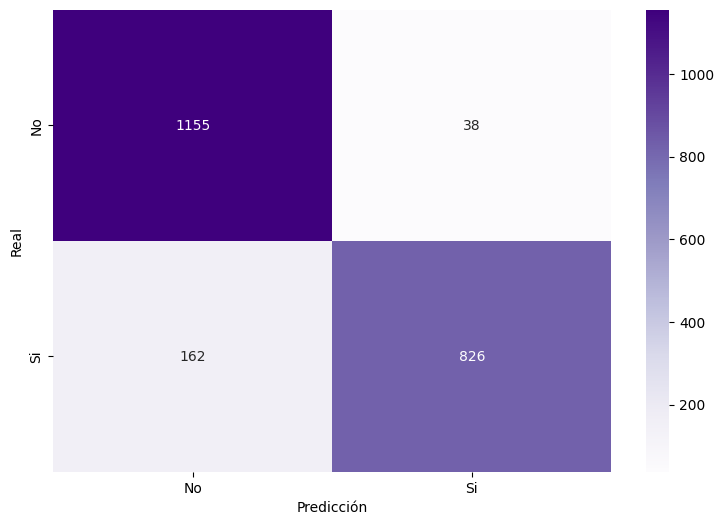

In [37]:
plt.figure(figsize=(9,6))
etiquetas= ["No", "Si"]
sns.heatmap(matriz_confusion,
            annot=True,
            fmt="d",   #formato de entero
            xticklabels=etiquetas,
            yticklabels=etiquetas,
            cmap= "Purples"
            )


plt.xlabel("Predicción")
plt.ylabel("Real");

In [38]:
fpr, tpr, thresholds=roc_curve(y, y_pred_prob)

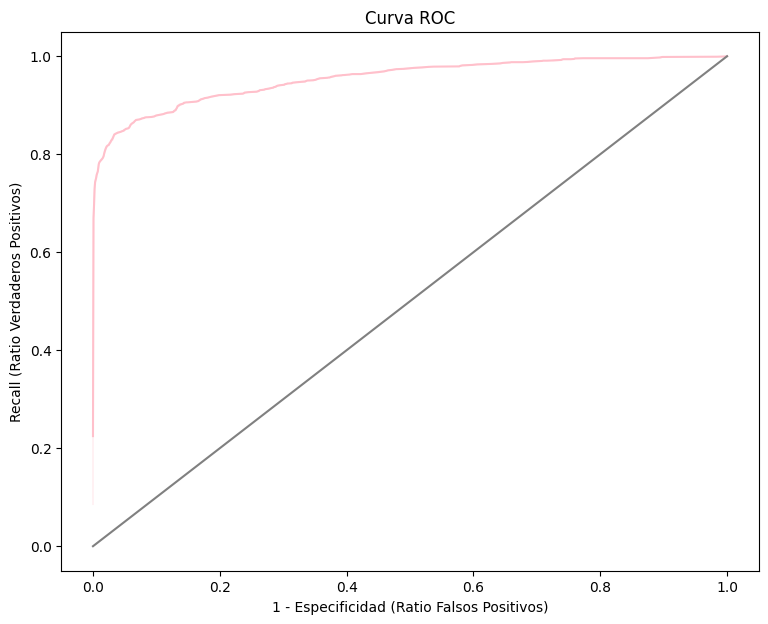

In [39]:
plt.figure(figsize=(9,7))
sns.lineplot(x=fpr,y=tpr,color="pink" )
sns.lineplot(x=[0,1], y= [0,1], color="grey")
plt.xlabel("1 - Especificidad (Ratio Falsos Positivos)")
plt.ylabel("Recall (Ratio Verdaderos Positivos)")
plt.title("Curva ROC");

In [40]:
importancia = modelo_final.coef_[0]

In [41]:
importancia_df = pd.DataFrame({
    "Feature": x.columns,
    "Importance": importancia
}).sort_values(by="Importance", ascending=False)

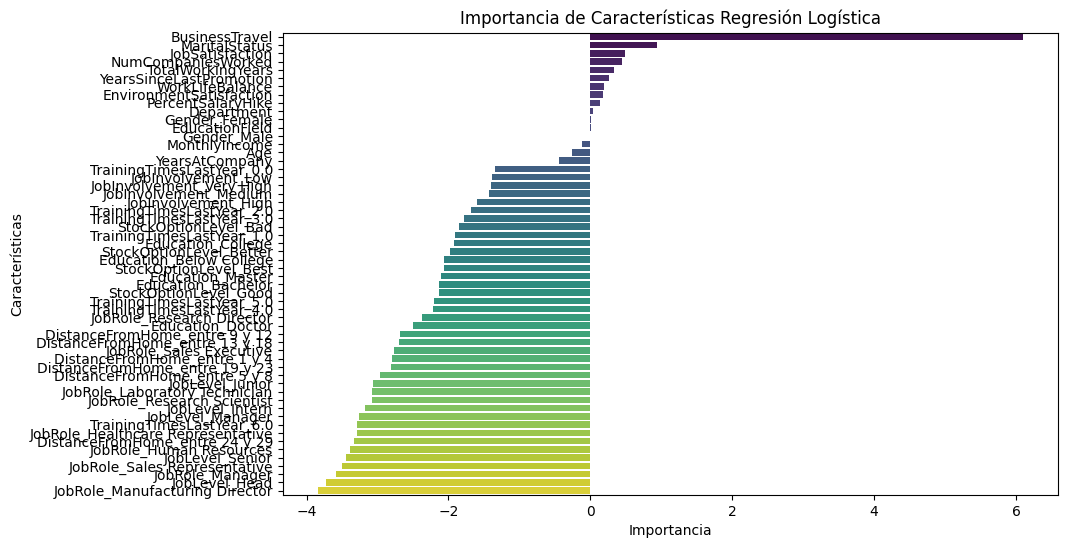

In [42]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=importancia_df, palette="viridis")
plt.title(f"Importancia de Características Regresión Logística")
plt.xlabel("Importancia")
plt.ylabel("Características")
plt.show()

In [35]:
with open('../../transformers/modelos3/MODELO_DEFINITIVO.pkl', 'wb') as l:
    pickle.dump(modelo_final, l)